# Title : InstructPix2Pix: Learning to Follow Image Editing Instructions
# Author:
**Name:** Saptarsi Halder

**Matricola:** 2125019

## **Aim** :

The goal of this project is to implement the **InstructPix2Pix** approach for conditional image editing using diffusion models. Specifically, the project aims to:

- Fine-tune a pre-trained text-to-image diffusion model to follow **natural language editing instructions**.
- Generate a **synthetic dataset** of (input image, edit instruction, edited image) triplets using existing captioning and generation models.
- Train a **conditional diffusion model** that, given an input image and a textual instruction, can output a **realistically edited image** without requiring per-instance fine-tuning.
- Enable the model to perform a wide variety of semantic and stylistic edits, such as:
  - Add fireworks in the sky
  - Make the scene look snowy
  - Turn this person into an anime character

## Selected papers:

**Paper Name** : InstructPix2Pix: Learning to Follow Image Editing Instructions
        Tim Brooks, Aleksander Holynski, Alexei A. Efros

**Paper Link** : [InstructPix2Pix on arXiv](https://arxiv.org/abs/2211.09800)

### Theoretica background and Key-concepts:

A method for editing images from human instructions: given an input image and a written instruction that tells the model what to do, our model follows these in
structions to edit the image. To obtain training data for this problem, we combine the knowledge of two large pretrained models—a language model (GPT-3) and a text-to-image model(Stable Diffusion)—to generate a large dataset of image-editing examples. The conditional diffusion model, InstructPix2Pix, is trained on our generated data, in a supervised manner and generalizes to real images and user-written instructions at inference time. Since it performs edits in the forward pass and
does not require per-example fine-tuning or inversion, our model edits images quickly, in a matter of seconds.


![process](https://raw.githubusercontent.com/sap200/inspad/refs/heads/main/Screenshot%202025-06-20%20010611.jpg)


---

#### 1. Generating Edit Instructions Using GPT-3
- Manually create 700 diverse image editing instructions (e.g., "make it snowy", "add fireworks").
- Fine-tune the GPT-3 model on these instructions so it can generalize and generate new ones.
- For each image caption:
  - Generate an input caption (original image description).
  - Generate an edit instruction (e.g., "turn it into a painting").
  - Generate an output caption (description of the edited image).

---

#### 2. Creating Image Pairs Using Prompt-to-Prompt
- Set up a Stable Diffusion pipeline to generate image pairs.
- Use the Prompt-to-Prompt technique to ensure structural similarity between the input and output images.
- For each input caption and output caption, generate:
  - Input image from input caption.
  - Edited image from output caption.

---

### 3. Modifying Stable Diffusion for Training
- Start from a pretrained Stable Diffusion checkpoint.
- Modify the input channels to accept an 8-channel tensor:
  - First 4 channels: the input image (latent space representation).
  - Next 4 channels: the noisy latent.

---

### 4. Training with Noisy Latents and Classifier-Free Guidance
- Add noise to the image latent using a predefined noise schedule.
- Use classifier-free guidance with the following equation:

![CFG_EQUATION](https://raw.githubusercontent.com/sap200/inspad/refs/heads/main/Screenshot%202025-06-20%20010716.jpg)

Where:
- \( z_t \) is the noisy latent at timestep \( t \).
- \( c_I \) is the encoded input image conditioning.
- \( c_T \) is the encoded text instruction conditioning.
- \( s_I \), \( s_T \) are guidance scales for image and text conditioning respectively.
- \( e_\theta(\cdot) \) is the noise prediction model (UNet).

---

### 5. Loss Function and Optimization
- Predict the noise using the modified UNet model.
- Minimize the **mean squared error (MSE)** between the predicted noise and the original input noise.
- Optionally use **Exponential Moving Average (EMA)** for smoother results, but with small datasets (e.g., 250 images), EMA may not learn useful features.

---






## Implementation details:

### Dataset

The dataset is synthetically generated.  
The edit instructions and output captions are generated by fine-tuning **GPT-3.5-turbo-0125**.

- Here is the link to the file used to fine-tune GPT-3.5-turbo:  
  [Fine-tuning file](https://github.com/sap200/inspad/blob/main/batched_prompts_finetune_data.jsonl)

- Screenshot of the fine-tuned GPT-3.5-turbo:  
  ![Fine-tuned GPT-3.5-turbo screenshot](https://raw.githubusercontent.com/sap200/inspad/refs/heads/main/Screenshot%202025-06-20%20013509.jpg)

- Python notebook used to request GPT-3.5-turbo for generating edit instructions and output captions from input captions:  
I generated around 40,000 triplets, and CLIP directional similarity was relaxed to 0.05, then intended in paper to take 0.2

  [Edit Instructions Notebook](https://github.com/sap200/inspad/blob/main/open_ai_batch_train_prompts_and_data_creation.ipynb)

- Here is the final merged triplets in the form of metadata with surrogate id and CLIP similarity
[Generated Triplets](https://raw.githubusercontent.com/sap200/inspad/refs/heads/main/metadata2.json)

- Python notebook used to generate input-output image pairs using the Prompt-to-Prompt method (based on a default Google notebook, modified to fit our requirements):
  [Google prompt-to-prompt repository](https://github.com/google/prompt-to-prompt)
  [Image Generation Notebook](https://github.com/sap200/inspad/blob/main/prompt-to-prompt_stable.ipynb)

- Link to generated image samples:  
  - Input images: [Input images folder](https://drive.google.com/drive/folders/1mJQnx5UYy5qRioWxyCdi5AEEOab_fNE6?usp=drive_link)  
  - Output images: [Output images folder](https://drive.google.com/drive/folders/1vCfsGuDMXY26gsl1HJy0cUoD90xO43PJ?usp=drive_link)  
  - Metadata (contains the edit instructions): [Metadata file](https://raw.githubusercontent.com/sap200/inspad/refs/heads/main/metadata2.json)

---

### Model

I use the Stable Diffusion **v1.5 checkpoint** as the base model to train our InstructPix2Pix model.

- Training was performed on **250 image samples**.  
- Although we generated over 3000 image samples, training on all 5000 requires an A100 GPU for a longer duration.  
- Each training epoch on all generated image samples with a batch size of 4 took approximately **45 minutes** and 3 compute units per epoch. so I decided to use lower number of image samples.

---

### Experimental Setup

- Fine-tuned OpenAI GPT-3.5-turbo using the file linked above.  
- Used the attached Python notebook to generate prompts.  
- Generated image triplets using the Prompt-to-Prompt method.  
- Training was performed on Google Colab with an **NVIDIA A100 GPU (40 GB RAM)**.  
- Ran **15 epochs** on 250 randomly selected training samples.  
- Inference was done using the same hardware setup (Python + A100 GPU).  
- All input images, output images, metadata, and notebooks are stored in the same Google Drive directory.

---




## Please find the result and analysis section below in this notebook after training. The section is named as "Result and Analysis"

## Load stable diffusion model's snapshot v1.5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
inp_images = '/content/drive/MyDrive/instruct_dataset/input_images'
out_images = '/content/drive/MyDrive/instruct_dataset/output_images'
metadata_path = '/content/drive/MyDrive/instruct_dataset/'

In [3]:
from huggingface_hub import snapshot_download

# Define where you want to store the model
model_dir = "/content/drive/MyDrive/instruct_dataset/stable-diffusion-v1-5"

# Download the full snapshot (only once)
snapshot_download(
    repo_id="runwayml/stable-diffusion-v1-5",
    local_dir=model_dir,
    local_dir_use_symlinks=False,  # Avoid symlinks for portability
    resume_download=True           # Skip existing files if re-run
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:980: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(
/usr/local/lib/p

Fetching 36 files:   0%|          | 0/36 [00:00<?, ?it/s]

'/content/drive/MyDrive/instruct_dataset/stable-diffusion-v1-5'

In [4]:
from diffusers import StableDiffusionPipeline
import torch

# Load the model from directory
pipe = StableDiffusionPipeline.from_pretrained(
    model_dir,
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
pipe.safety_checker = None

## Latent space Encoding and decoding

In [6]:
# Extract vae
vae = pipe.vae
vae.eval()
vae.requires_grad_(False)
print(vae.device)
print(vae.config.scaling_factor)

cuda:0
0.18215


In [10]:
# ## Another way to laod VAE
# from diffusers import AutoencoderKL
# vae = AutoencoderKL.from_pretrained(model_dir, subfolder="vae").cuda()
# vae.eval()
# vae.requires_grad_(False)
# print(vae.device)
# print(vae.config.scaling_factor)

In [7]:
print(vae.device)
print(pipe.device)

cuda:0
cuda:0


In [8]:
# Image encoder/decoder to latent space using vae
from PIL import Image
import torch

def encode_to_latent_space(image_tensor):
    with torch.no_grad():
        latents = vae.encode(image_tensor.to(vae.device)).latent_dist.sample() * vae.config.scaling_factor
        return latents

def encode_to_latent_space_non_gaussian(image_tensor):
    with torch.no_grad():
        latents = vae.encode(image_tensor.to(vae.device)).latent_dist.mode() * vae.config.scaling_factor
        return latents

def decode_from_latent_space(latents):
    with torch.no_grad():
        decoded = vae.decode(latents.to(vae.device) / vae.config.scaling_factor).sample
        return decoded

def convert_decoded_latent_to_pil(decoded_image):
    decoded_image = (decoded_image.clamp(-1, 1) + 1) / 2  # Rescale to [0, 1]
    decoded_image = decoded_image.cpu().permute(0, 2, 3, 1).squeeze().numpy()
    decoded_image = (decoded_image * 255).astype("uint8")

    return Image.fromarray(decoded_image)


In [9]:
# Text encoding using CLIPTokenizer
from accelerate import init_empty_weights, load_checkpoint_and_dispatch
from transformers import CLIPTokenizer, CLIPTextModel
import torch

tokenizer = CLIPTokenizer.from_pretrained(model_dir, subfolder="tokenizer")
text_encoder = CLIPTextModel.from_pretrained(model_dir, subfolder="text_encoder").eval().cuda()

In [10]:
print(text_encoder.device)

cuda:0


In [11]:
def encode_text(text_prompt):
    inputs = tokenizer(text_prompt, return_tensors="pt", padding="max_length", max_length=77, truncation=True)
    inputs = {k: v.cuda() for k, v in inputs.items()}
    with torch.no_grad():
        text_embedding = text_encoder(**inputs).last_hidden_state
    return text_embedding

In [12]:
ci = encode_text("Hi ! Please create me an image of a cat....")
print(ci.shape)
print(ci.device)

torch.Size([1, 77, 768])
cuda:0


## Load the dataset

In [13]:
import json
import os
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as T
from torchvision import transforms
import random



class InstructPix2PixDataset(Dataset):
    def __init__(self, json_file_path, limit, transform=None):
        with open(json_file_path, 'r') as f:
            self.data = json.load(f)

        if limit < len(self.data):
            self.data = random.sample(self.data, limit)


        self.transform = transform or self.default_transforms()

    def default_transforms(self):
        return T.Compose([
            T.Resize((576, 576))   ,
            T.RandomResizedCrop(512, scale=(512/576, 1.0)),
            T.RandomHorizontalFlip(),
            T.ToTensor(),
            transforms.Normalize([0.5], [0.5])  # scales to [-1, 1]
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        entry = self.data[idx]
        inp_p = inp_images + '/' + os.path.basename(entry['input_image_path'])
        out_p = out_images + '/' + os.path.basename(entry['output_image_path'])

        input_img = Image.open(inp_p).convert('RGB')
        output_img = Image.open(out_p).convert('RGB')
        edit_instruction = entry['edit_instruction']

        # Both images should get same transform
        seed = torch.seed()
        torch.manual_seed(seed)
        input_img = self.transform(input_img)
        torch.manual_seed(seed)
        output_img = self.transform(output_img)

        return {
            'input_image': input_img,
            'edit_instruction': edit_instruction,
            'output_image': output_img,
        }


In [14]:
import gc

def clean_cuda():
    torch.cuda.empty_cache()
    gc.collect()

clean_cuda()

In [16]:
# # Example of data loader
# from torch.utils.data import DataLoader

# dataset = InstructPix2PixDataset(metadata_path + "/metadata2.json")
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
# drake = torch.Tensor()
# for batch in dataloader:
#     input_images = batch["input_image"]
#     print(input_images.shape)
#     x = encode_to_latent_space(input_images.to(vae.device))
#     drake=encode_to_latent_space_non_gaussian(input_images)
#     print(x.shape, drake.shape)
#     edit_texts = batch["edit_instruction"]
#     target_images = batch["output_image"]
#     break  # use batch


In [15]:
clean_cuda()

## Modifying the Stable Diffusion network for Instruct Pix 2 Pix
shape of latent image to be given as an input is (4, 64, 64), and the text encoding size is (1, 77, 768), we need to use this dimensions to modify our stable diffusion network, so in the input we can add (4,64,64) conv layer to take the image also as an input

How do we support input of this image, In this layer

  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

we want to make the channel size to 8, so that the latent noise zt produced by diffusion mode of same size [B, 4, 64, 64] is concatenated with out input image latent over the channel, and hence we have 8 channels so we change 4 to 8 in new conv2d, and we initialize the weight of the new channels as 0

In [17]:
unet = pipe.unet

In [18]:
print(unet.conv_in)
print(unet.conv_in.out_channels)

Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
320


In [19]:
import torch.nn as nn

device = next(unet.parameters()).device  # Get current device of UNet
print(device)

old_conv = unet.conv_in
new_conv = nn.Conv2d(
    in_channels=8,
    out_channels=old_conv.out_channels,
    kernel_size=old_conv.kernel_size,
    stride=old_conv.stride,
    padding=old_conv.padding,
    bias=old_conv.bias is not None
)

new_conv.to(device)

with torch.no_grad():
    new_conv.weight.zero_()
    new_conv.weight[:, :4, :, :].copy_(unet.conv_in.weight)

unet.conv_in = new_conv

cuda:0


In [20]:
print(unet.conv_in)
print(unet.conv_in.out_channels)

Conv2d(8, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
320


# Training

In [21]:
# # Load Unet weights.
# d_path = '/content/drive/MyDrive/instruct_dataset/checkpoints/'
# f_path = os.path.join(d_path, f"unet_epoch_11.pt")

# checkpoint = torch.load(f_path, weights_only=False)
# unet.load_state_dict(checkpoint['model_state_dict'])

In [22]:
from diffusers import UNet2DConditionModel
from diffusers.training_utils import EMAModel
ema_unet = EMAModel(unet.parameters(), model_cls=UNet2DConditionModel, model_config=unet.config)

In [26]:
from torch.utils.data import DataLoader

# get a random sample of 250 images
# for easy, fast training and inference.
# Training 5K images takes a lot of time.
dataset = InstructPix2PixDataset(metadata_path + "/metadata2.json", 250)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)


In [27]:
num_epochs=15
total_training_steps = (len(dataloader.dataset)*num_epochs) // dataloader.batch_size
print(total_training_steps)

1875


In [29]:
len(dataloader)

125

In [30]:
from torch.optim.lr_scheduler import LambdaLR

# _lr = 5e-5
_lr = 1e-4
# AdamW optimizer with your params
optimizer = torch.optim.AdamW(
    unet.parameters(),
    lr=_lr,
    betas=(0.9, 0.999),
    weight_decay=1e-5,
    eps=1e-8
)

max_grad_norm = 1.0
warmup_steps = 200

# Cosine schedule with warmup function
def lr_lambda(current_step):
    if current_step < warmup_steps:
        # Linear warmup
        return float(current_step) / float(max(1, warmup_steps))
    else:
        # Cosine decay
        progress = float(current_step - warmup_steps) / float(max(1, total_training_steps - warmup_steps))
        return 0.5 * (1.0 + torch.cos(torch.tensor(progress * 3.1415926535))).item()

lr_scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

In [31]:
def save_checkpoint(model, optimizer, epoch, filepath):
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch,
    }
    torch.save(checkpoint, filepath)

def load_checkpoint(model, optimizer, filepath):

    checkpoint = torch.load(filepath, weights_only=False)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1  # Continue from next epoch
    return model, optimizer, start_epoch

In [32]:
# sd = '/content/drive/MyDrive/instruct_dataset/checkpoints'
# fp = os.path.join(sd, f"unet_epoch_2.pt")
# state_dict = torch.load(fp)
# unet.load_state_dict(state_dict)

In [33]:
# sd = '/content/drive/MyDrive/instruct_dataset/checkpoints'

# fp = os.path.join(sd, f"unet_epoch_6.pt")
# unet, optimizer , start_epoch = load_checkpoint(unet, optimizer, fp)

In [34]:
# start_epoch = 0
# print(start_epoch, num_epochs)

In [35]:
unet.parameters()

<generator object Module.parameters at 0x782c4f79a5e0>

## Classifier free guidance with 5% dropout in training exaples

In [36]:
import random

def randomly_drop_conditionings(E_CI, CT, drop_prob=0.05):
    new_E_CI = E_CI.clone()
    new_CT = CT.clone()
    batch_size = E_CI.shape[0]

    for i in range(batch_size):
        p = random.random()
        if p < drop_prob:  # drop image conditioning only
            new_E_CI[i] = 0
        elif p < 2 * drop_prob:  # drop text conditioning only
            new_CT[i] = 0
        elif p < 3 * drop_prob:  # drop both
            new_E_CI[i] = 0
            new_CT[i] = 0

    return new_E_CI, new_CT

In [37]:
def classifier_free_guidance(unet_d, z_t, t, cI, cT, sI=1.3, sT=7.5):
    """
    Apply classifier-free guidance with dual conditioning (image + text).

    Args:
        unet: The UNet model.
        z_t: Noisy latent tensor.
        t: Timesteps.
        cI: Encoded image conditioning (e.g., latent from input image).
        cT: Encoded text conditioning.
        sI: Guidance scale for image.
        sT: Guidance scale for text.

    Returns:
        Guided noise prediction tensor.

    We find that values of sT in the range 5-10 and values of sI in the range 1-1.5typically produce the best results.
    so I choose SI and ST as the average of these values
    """
    # Unconditioned: no text, no image
    batch_size = z_t.shape[0]
    device = z_t.device
    zeros = torch.zeros_like(cI).to(device)  # zero tensor same shape as cI
    zeros1 = torch.zeros_like(cT).to(device)  # zero tensor same shape as cI
    uncondTxt = encode_text([""]*batch_size)

    noise_pred_uncond = unet_d(torch.cat([z_t, zeros], dim=1), timestep=t, encoder_hidden_states=uncondTxt).sample

    # Conditioned on image only
    noise_pred_img_only = unet_d(torch.cat([z_t, cI], dim=1), timestep=t, encoder_hidden_states=uncondTxt).sample

    # Conditioned on image + text
    noise_pred_both = unet_d(torch.cat([z_t, cI], dim=1), timestep=t, encoder_hidden_states=cT).sample

    # Final guidance as per paper's equation
    guided_pred = (
        noise_pred_uncond +
        sI * (noise_pred_img_only - noise_pred_uncond) +
        sT * (noise_pred_both - noise_pred_img_only)
    )
    return guided_pred


In [38]:
from diffusers import DDPMScheduler

noise_scheduler = DDPMScheduler.from_pretrained(model_dir, subfolder="scheduler")

In [39]:
clean_cuda()

In [40]:
from tqdm import tqdm

# Initialize the scheduler
start_epoch = 0
loss_values = []
# since training is paused and resumed, we load scheduler from the config
# scheduler = DDPMScheduler.from_pretrained("/content/drive/MyDrive/instruct_dataset/scheduler/scheduler_config.json")



for epoch in range(start_epoch, num_epochs):
    epoch_loss = 0.0

    with tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False) as batch_pbar:
        for batch in batch_pbar:
            input_img = batch["input_image"].to(vae.device)  # PIL converted & normalized
            target_img = batch["output_image"].to(vae.device)
            text_prompt = batch["edit_instruction"]


            # Encode to latent space
            z = encode_to_latent_space(target_img)
            E_CI = encode_to_latent_space_non_gaussian(input_img)
            CT = encode_text(text_prompt)

            # Randomly drop conditionings for classifier-free guidance training
            E_CI, CT = randomly_drop_conditionings(E_CI, CT, drop_prob=0.03)

            # add noise
            t = torch.randint(0, noise_scheduler.config.num_train_timesteps, (z.shape[0],), device=z.device).long()
            noise = torch.randn_like(z)
            z_t = noise_scheduler.add_noise(z, noise, t)


            # predict noise
            noise_pred = classifier_free_guidance(unet, z_t, t, E_CI, CT, sI=3, sT=9)


            # Loss back propagation
            # real one
            loss = torch.nn.functional.mse_loss(noise_pred.float(), noise.float(), reduction='mean')

            loss.backward()
            torch.nn.utils.clip_grad_norm_(unet.parameters(), max_norm=1.0)

            optimizer.step()
            lr_scheduler.step()

            ema_unet.step(unet.parameters())

            optimizer.zero_grad()
            epoch_loss += loss.item()
            batch_pbar.set_postfix(loss=loss.item(), lr=lr_scheduler.get_last_lr()[0])



            clean_cuda()

        # if (epoch+1)%3 == 0:
        #     save_dir = '/content/drive/MyDrive/instruct_dataset/checkpoints'
        #     os.makedirs(save_dir, exist_ok=True)  # Make sure directory exists
        #     save_checkpoint(unet, optimizer, epoch, os.path.join(save_dir, f"unet_epoch_{epoch+3}.pt"))
        #     noise_scheduler.save_config("/content/drive/MyDrive/instruct_dataset/scheduler")
        average_loss=epoch_loss / len(dataloader)
        loss_values.append(average_loss)
        if average_loss < 0.001:
            break


        print(f"Epoch {epoch + 1}/{num_epochs} - Avg Loss: {epoch_loss / len(dataloader):.4f}")

Epoch 1/15 - Avg Loss: 0.1814


Epoch 2/15 - Avg Loss: 0.1742


Epoch 3/15 - Avg Loss: 0.1589


Epoch 4/15 - Avg Loss: 0.1566


Epoch 5/15 - Avg Loss: 0.1479


Epoch 6/15 - Avg Loss: 0.1479


Epoch 7/15 - Avg Loss: 0.1404


Epoch 8/15 - Avg Loss: 0.1314


Epoch 9/15 - Avg Loss: 0.1513


Epoch 10/15 - Avg Loss: 0.1347


Epoch 11/15 - Avg Loss: 0.1505


Epoch 12/15 - Avg Loss: 0.1464


Epoch 13/15 - Avg Loss: 0.1466


Epoch 14/15 - Avg Loss: 0.1399


Epoch 15/15 - Avg Loss: 0.1384


In [78]:
save_dir = '/content/drive/MyDrive/instruct_dataset/checkpoints'
os.makedirs(save_dir, exist_ok=True)  # Make sure directory exists
torch.save(unet, os.path.join(save_dir, f"small_unet_1.pt"))

In [41]:
print(loss_values)

[0.1813800026923418, 0.17420242711901665, 0.15886089008674026, 0.15663521990925072, 0.14789776776731015, 0.14790375171601772, 0.1403588550183922, 0.13140633315220476, 0.15129166208021344, 0.13465817233361305, 0.15050466067716478, 0.1463738321121782, 0.14656468807533382, 0.1398630403392017, 0.1383656941950321]


In [43]:
# # save ema weights
# ema_model_dir = "/content/drive/MyDrive/instruct_dataset/ema_model_dir/ema_unet.pth"
# torch.save(ema_unet.state_dict(), ema_model_dir)

## Result and Analysis

## Loss Function Plot

[0.1813800026923418, 0.17420242711901665, 0.15886089008674026, 0.15663521990925072, 0.14789776776731015, 0.14790375171601772, 0.1403588550183922, 0.13140633315220476, 0.15129166208021344, 0.13465817233361305, 0.15050466067716478, 0.1463738321121782, 0.14656468807533382, 0.1398630403392017, 0.1383656941950321]


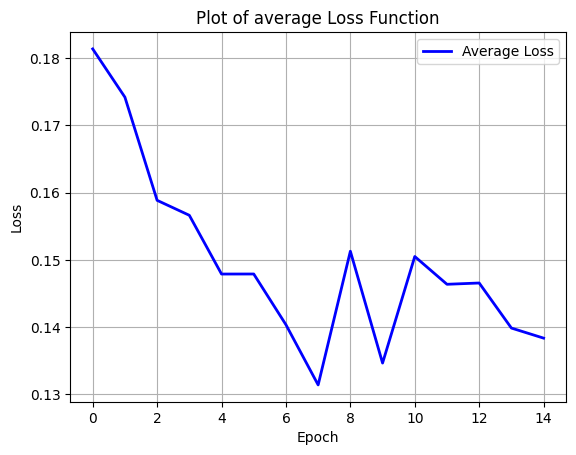

In [42]:
import matplotlib.pyplot as plt

# Sample data points
x = range(0, len(loss_values))
y = loss_values
print(y)
# Create the line chart
plt.plot(x, y, label='Average Loss', color='blue', linewidth=2)

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Plot of average Loss Function')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Predictions

In [43]:
clean_cuda()

# Prediction on real image

- the model has learned a little even with training of 19 epochs, and the reason is less dataset and GPU constraint even with colab pro.
With colab pro's A100 GPU I could run one epoch containing around 5000 images in 1 hour. In the research text, they used 8 X NVIDIA GPU

Inference: We use classifier free guidance for inference, we do inference using ema_model and unet


In [44]:
from torchvision import transforms as T
from PIL import Image
import torch
from diffusers import DDPMScheduler, EulerDiscreteScheduler, DPMSolverMultistepScheduler, DDIMScheduler
from torchvision import transforms

# --- Config ---
def predict(model_net,
            noise_scheduler,
            edit_instruction,
            image_file_path,
            seed,
            num_inference_steps,
            denormalize,
            SI,
            ST
            ):

    prompt = edit_instruction
    image_path = image_file_path

    torch.manual_seed(seed)

    # Encode prompt
    encoded_prompt = encode_text(prompt)

    # Load and preprocess image
    pil_image = Image.open(image_path).convert("RGB")
    transf = T.Compose([
        T.Resize((512, 512)),
        T.ToTensor(),
        transforms.Normalize([0.5], [0.5])  # scales to [-1, 1]

    ])
    img_tensor = transf(pil_image).unsqueeze(0).cuda()  # batch dim and cuda

    # Encode image to latent
    encoded_image = encode_to_latent_space_non_gaussian(img_tensor)

    # Initialize scheduler
    # scheduler = DDPMScheduler.from_pretrained("/content/drive/MyDrive/instruct_dataset/scheduler/scheduler_config.json")

    noise_scheduler.set_timesteps(num_inference_steps)

    # Initialize latent z_t by adding noise to the encoded image at the first timestep
    timesteps = noise_scheduler.timesteps
    init_t = timesteps[0]
    noise = torch.randn_like(encoded_image)
    z_t = noise_scheduler.add_noise(original_samples=encoded_image, noise=noise, timesteps=init_t)

    # Denoising loop over scheduler timesteps
    with torch.no_grad():
        for i, t in enumerate(timesteps):
            t = t.long()
            # Predict noise with classifier free guidance
            noise_pred = classifier_free_guidance(
                model_net, z_t, t, encoded_image, encoded_prompt, sI=SI, sT=ST
            )

            # print(noise_pred.shape)

            # Step scheduler to get previous latent (less noisy)
            z_t = noise_scheduler.step(noise_pred, t, z_t).prev_sample

            # --- Manual cleanup to reduce CUDA memory usage ---
            del noise_pred
            clean_cuda()
    # Decode final latent to image
    decoded_image = decode_from_latent_space(z_t)
    # denormalzie
    if denormalize:
        decoded_image = decoded_image * 0.5 + 0.5

    # Convert to PIL and display
    output_pil_image = convert_decoded_latent_to_pil(decoded_image)
    return output_pil_image

In [48]:
import matplotlib.pyplot as plt

def display_image(img1, img2, width=8, height=4):
    """
    Display two PIL images side by side horizontally with hardcoded titles.

    Parameters:
    - img1, img2: PIL.Image objects
    - width: total width of the figure (default 8)
    - height: height of the figure (default 4)
    """
    fig, axes = plt.subplots(1, 2, figsize=(width, height))

    axes[0].imshow(img1)
    axes[0].set_title("Input Image")
    axes[0].axis('off')

    axes[1].imshow(img2)
    axes[1].set_title("Output Image")
    axes[1].axis('off')

    plt.show()


## prediction-1 : Given an input image, try to add an object on the image in this case adding a dianosaur.

Use DDPMSScheduler for noise and num_inference_steps = 50.
SI and ST controls image similarity and editing respectively.

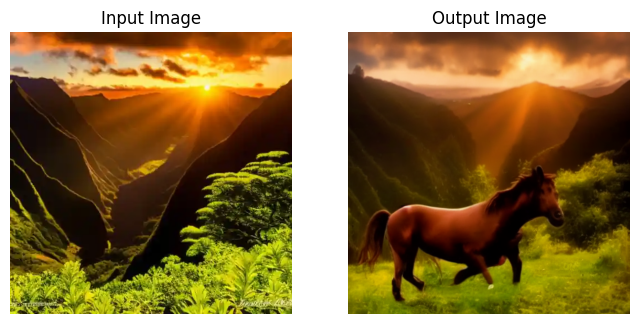

In [51]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/3000318.webp"
pmp = "Add a horse"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            2,
            9
        )

display_image(inp_img, out_im)
clean_cuda()

### For the same image this time increase SI to 3.
Since Image similarity index is high, the edit may take place but the image similarity will be maintained with higher probability

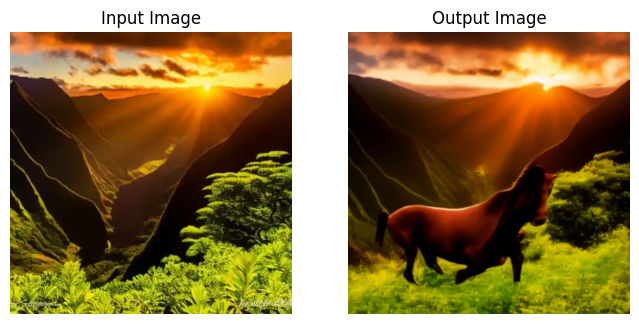

In [53]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/3000318.webp"
pmp = "Add a horse"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            3, # SI increased to 3
            9
        )

display_image(inp_img, out_im)
clean_cuda()

### Now increase SI exteremely high to 6
The edit most likely won't take place, because the neural network will try to maintain the image structure

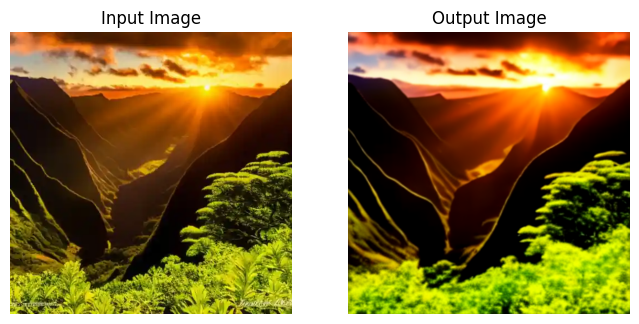

In [54]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/3000318.webp"
pmp = "Add a horse"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            6, # SI increased to 6
            9
        )

display_image(inp_img, out_im)
clean_cuda()

### Now we keep the SI as 3 and ST as 5
since ST is decreased, edit may be weaker maybe distorted

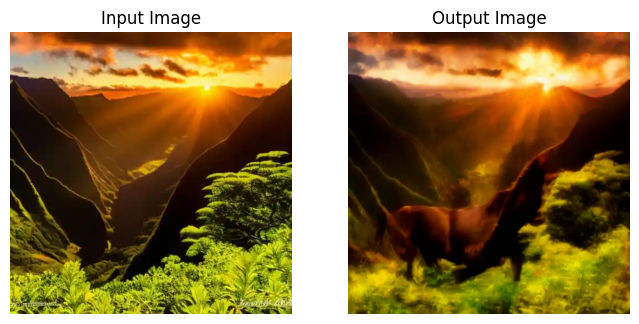

In [57]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/3000318.webp"
pmp = "Add a horse"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            3, # SI as 2
            5 # st as 5
        )

display_image(inp_img, out_im)
clean_cuda()

## prediction-2 : Given an input image try to change it to a painting

This time we try to change the landscape, specifically we add snow on the top of the mountain for the input image.

SI = 2, so we allow the nn to be creative
ST = 9, so the edit is stronger



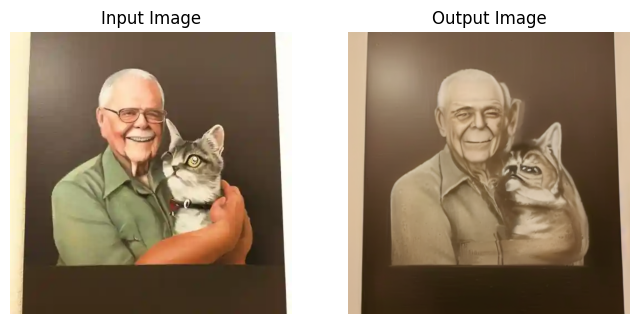

In [81]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/3003650.webp"
pmp = "make it look like a charcoal sketch"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            3,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

## Prediction-3:  Replace the cat with a dog

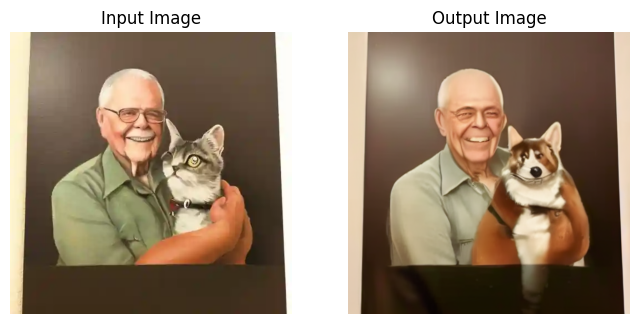

In [85]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/3003650.webp"
pmp = "change the cat to a dog"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            3.5,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

## prediction-4 : Check the effect of changes in num_inference_steps

We want to visualize the result of change in number of inference steps.
num_inference_steps is number of denoising steps, the more it is the better, but at one point increasing number of denoising steps doesn't changes much, and is a waste of computational resource.

We expect that with more inference steps upto a threshold, the image quality is improved, but after a certain threshold there is no change.
As we see in this example, after 100, there is no significant increase in the image quality.
The threshold maybe lower than 100.

In this prediction we use the following

a) num_inference_steps=100

b) num_inference_steps=50

c) num_inference_steps=25

d) num_inference_steps=150

**num_inference_steps=100**

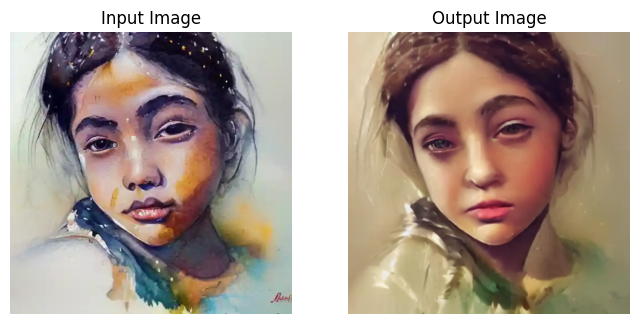

In [93]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/150931.webp"
pmp = "turn her into a real person"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            100,
            False,
            3.5,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

### num_inference_steps = 50

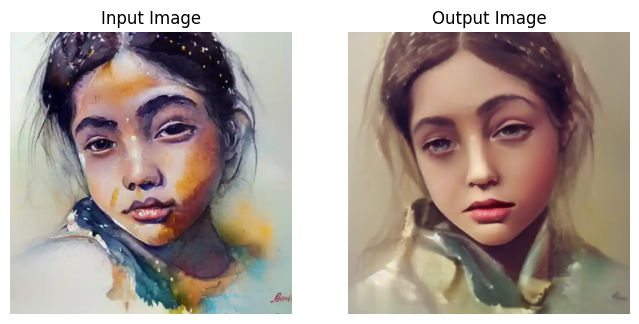

In [94]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/150931.webp"
pmp = "turn her into a real person"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            3.5,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

### num_inference_steps = 25

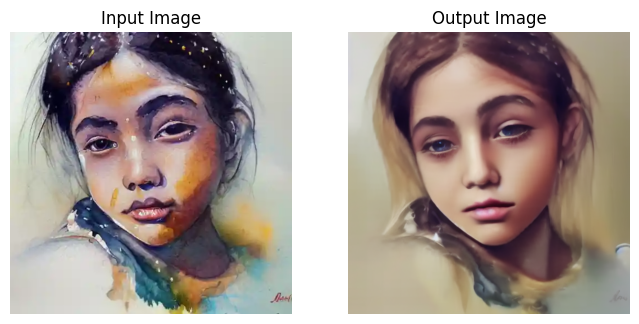

In [95]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/150931.webp"
pmp = "turn her into a real person"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            25,
            False,
            3.5,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

### num_inference_steps = 150

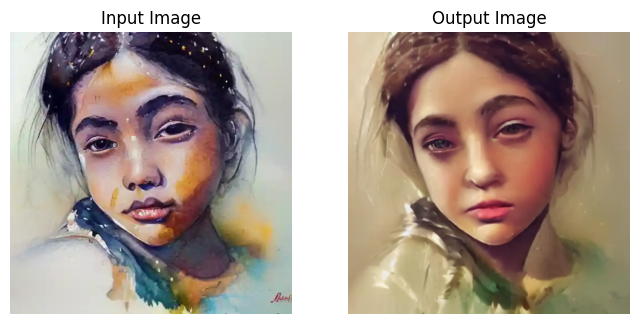

In [96]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/150931.webp"
pmp = "turn her into a real person"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            100,
            False,
            3.5,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

In [87]:
dataloader.dataset[17]['edit_instruction']

'Make it look like a Disney cartoon'

## prediction-4 - change the color of the jacket to Green -  Localized Edits



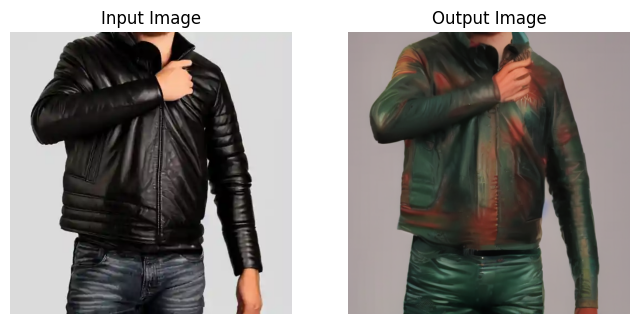

In [104]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/217.webp"
pmp = "color the jacket green"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            3,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

### change the jacket color to red

## prediction-5 : style Transformation edits

### Making her into an anime character

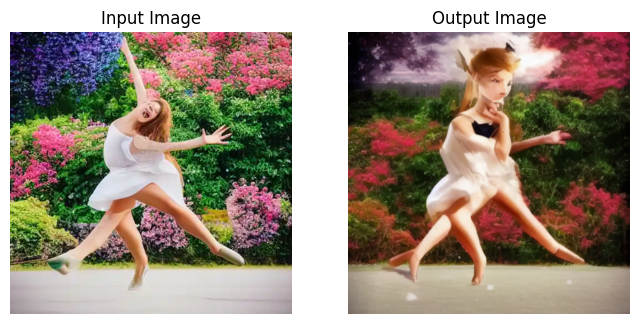

In [120]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/427.webp"
pmp = "Make her as if she were an anime character"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            3,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

### Making her into a cartoon

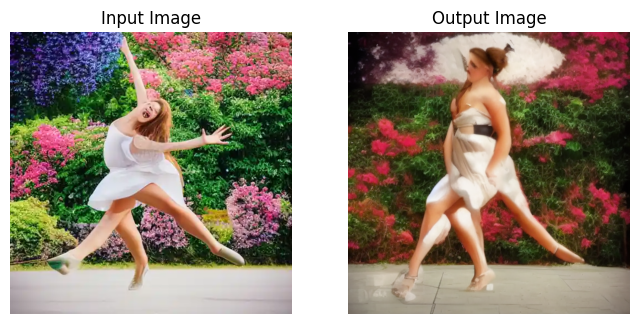

In [118]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/427.webp"
pmp = "Make her as if she were a cartoon"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            2.5,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

### Turning into a sculpture

Limitations due to less data during training it fails to keep the original structure

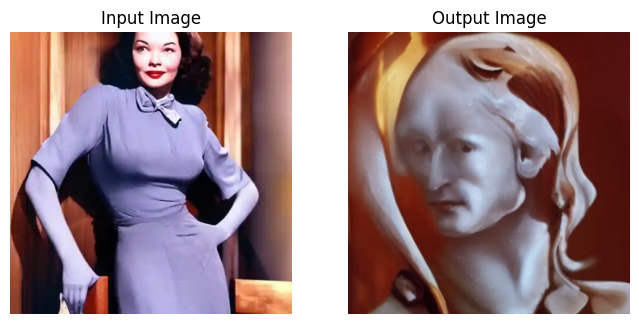

In [141]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/352.webp"
pmp = "Make it a marble roman sculpture"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            2.5,
            10
            )

display_image(inp_img, out_im)
clean_cuda()

## prediction-6 : Changing the context

While changing the context SI should be high enough to keep the image similarity, and also the ST should be high enough to apply the edits

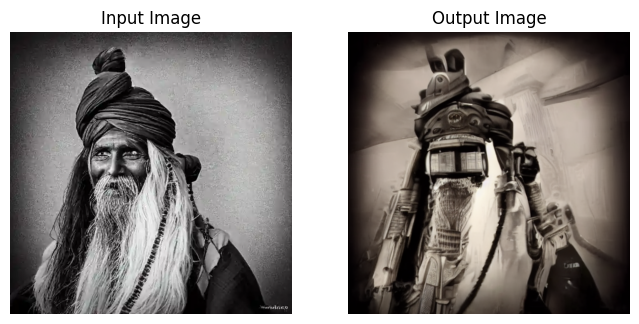

In [127]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/106.webp"
pmp = "turn the humans into robots"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            3.5,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

### Make here look like a chinese girl

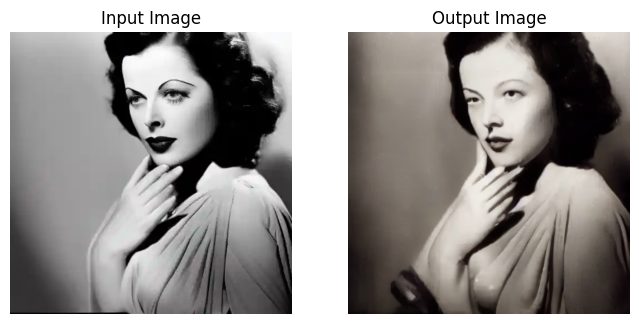

In [152]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/495.webp"
pmp = "turn her look like a chinese girl"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            2.8,
            8
            )

display_image(inp_img, out_im)
clean_cuda()

## Turning the image into 1950s



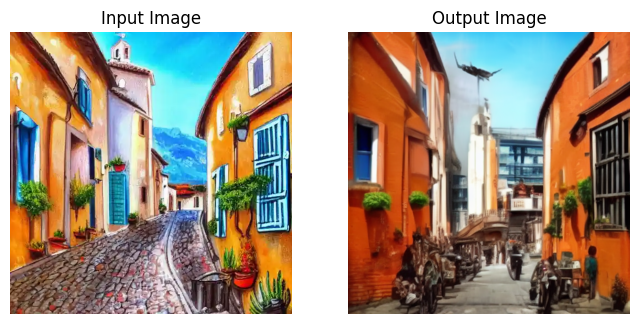

In [150]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/510.webp"
pmp = "turn it into 1950s"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            4,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

### Adding mountain

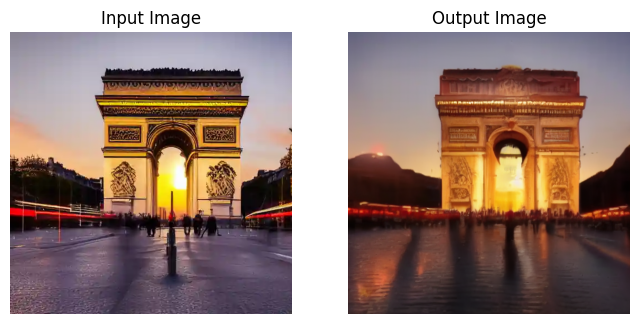

In [154]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/150330.webp"
pmp = "add a mountain in this image"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            2.6,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

## Limitations

Since the images were randomly sampled, its possible the model has never seen an example of how to make a landscape snowy and hence it is unable to make it snowy.

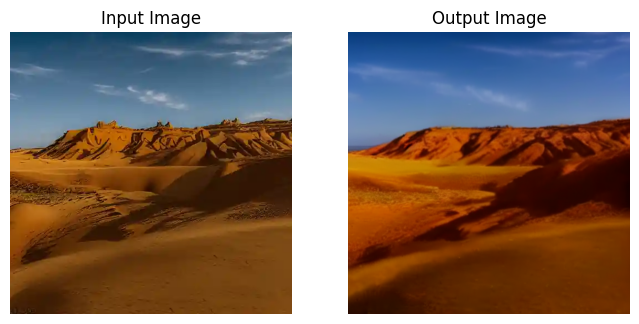

In [162]:
## Prediction using EMA UNET

im_p = "/content/drive/MyDrive/instruct_dataset/input_images/150843.webp"
pmp = "make it snowy"
inp_img = Image.open(im_p).convert("RGB")
clean_cuda()
out_im = predict(
            unet,
            noise_scheduler,
            pmp,
            im_p,
            42,
            50,
            False,
            5,
            9
            )

display_image(inp_img, out_im)
clean_cuda()

In [1]:
## separator

## Limitations and Reflections

### Limitations

- I couldn't achieve a wide diversity of edits due to limited data. However, I was able to implement and test a few meaningful image edits.
- I was restricted by the compute units available on Google Colab and lacked the hardware required for parallel training. This was a major bottleneck for both training and inference, especially when working with 5000 images. In contrast, the original research paper used over **450,000** image-edit pairs and trained the model using **8 NVIDIA A100 GPUs**.
- The paper used a constant learning rate of `1e-4`, but in my experiments, a constant learning rate made convergence difficult. I found that using a **learning rate scheduler** with a **warmup phase** resulted in better and more stable convergence.
- I couldn't fully evaluate the effect of using an **Exponential Moving Average (EMA)** model due to the small dataset size. While its smoothing effect was somewhat visible, the EMA model couldn't learn robust features in this scenario.

### Reflections

- I learned how to use **Stable Diffusion** for image generation and editing tasks.
- I explored the **Prompt-to-Prompt** technique to generate paired images with consistent structure.
- I fine-tuned **GPT-3.5** to generate custom text data for paired captioning and edit instructions.
- I became familiar with advanced training techniques such as **learning rate scheduling**, **warmup strategies**, **latent space conditioning**, and **classifier-free guidance**.
- One of my mistakes was starting full training without being fully confident in the convergence of the training loop. Next time, I will first validate the setup with dummy data to ensure convergence before committing computational resources.
- A philosophical insight I gained is that **neural networks are generic function approximators** — they learn by identifying and internalizing patterns from data. This foundational concept guides the way we design and debug deep learning models.


# References (papers, code repositories, datasets).
- paper links : [paper Link](https://arxiv.org/abs/2211.09800)

- Dataset : Synthetic and the generation and the dataset both are present in the dataset section, on the top of this notebook, and a few from CLIFF dataset: https://huggingface.co/datasets/timbrooks/instructpix2pix-clip-filtered/


- Code Repository 1 : https://github.com/mahdip72/InstructPix2Pix/

- code Repository 2 : https://github.com/timothybrooks/instruct-pix2pix



## Reproducibility instructions

### For training
- To run the training, download the input_images folder, output_images folder, and the metadata2.json file.

  - Input images: [Input images folder](https://drive.google.com/drive/folders/1mJQnx5UYy5qRioWxyCdi5AEEOab_fNE6?usp=drive_link)  
  - Output images: [Output images folder](https://drive.google.com/drive/folders/1vCfsGuDMXY26gsl1HJy0cUoD90xO43PJ?usp=drive_link)  
  - Metadata (contains the edit instructions): [Metadata file](https://raw.githubusercontent.com/sap200/inspad/refs/heads/main/metadata2.json)

- paste all of them inside in the same folder of google drive.
- connect to A100 GPU runtime in the colab and run the notebook.

### For inference

- The result and analysis class of this notebook has predict function which can be used to run inferences

### For prompt generation
- Fine tune openai's gpt-3.5-turbo using this [file](https://raw.githubusercontent.com/sap200/inspad/refs/heads/main/batched_prompts_finetune_data.jsonl), download the [notebook](https://github.com/sap200/inspad/blob/main/open_ai_batch_train_prompts_and_data_creation.ipynb), replace the secret key and base model name of gpt, and run to generate the prompts.

### For image generation
- Clone this [prompt-to-prompt repository](https://github.com/google/prompt-to-prompt)
- Replace prompt-to-prompt_stable.ipynb with this [notebook](https://github.com/sap200/inspad/blob/main/prompt-to-prompt_stable.ipynb)
- Run the notebook

